In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
DATA_PATH = "../cleaned_output.csv"
df = pd.read_csv(DATA_PATH)
df.head()

,id,"Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)",Q2: How many ingredients would you expect this food item to contain?,Q3: In what setting would you expect this food to be served? Please check all that apply,Q4: How much would you expect to pay for one serving of this food item?,Q5: What movie do you think of when thinking of this food item?,Q6: What drink would you pair with this food item?,"Q7: When you think about this food item, who does it remind you of?",Q8: How much hot sauce would you add to this food item?,Label
0,716549,3,6.0,"Week day lunch,At a party,Late night snack",5.0,cloudy with a chance of meatballs,coca cola,Friends,A little (mild),Pizza
1,715742,4,2.0,"Week day lunch,At a party,Late night snack",5.0,all sort of american young boy movies,coca cola,"Friends,Teachers,Strangers",NaN,Pizza
2,727333,3,5.0,"Week day lunch,Week day dinner,Weekend lunch,W...",NaN,action movie,coca cola,Friends,A moderate amount (medium),Pizza
3,606874,4,6.5,"Week day lunch,Week day dinner,Weekend lunch,W...",3.0,mamma mia,pop,"Siblings,Friends,Teachers",I will have some of this food item with my hot...,Pizza
4,505318,2,3.0,"Week day lunch,Week day dinner,Weekend lunch,W...",5.0,cloudy with a chance of meatballs,pop,"Siblings,Friends",A little (mild),Pizza


In [33]:
Q3 = 'Q3: In what setting would you expect this food to be served? Please check all that apply'
Q7 = 'Q7: When you think about this food item, who does it remind you of?'
Q8 = 'Q8: How much hot sauce would you add to this food item?'
Q5 = 'Q5: What movie do you think of when thinking of this food item?'
Q6 = 'Q6: What drink would you pair with this food item?'
# df = df.drop(columns=[Q5, Q6], errors='ignore')  # These columns can have a lot of different values resulting in a large number of columns after one-hot encoding

In [34]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns.remove('Label')
comma_separated_features = [Q3, Q7, Q8]

print(f"Total categorical columns: {len(categorical_columns)}")
print(f"Processing {len(comma_separated_features)} comma-separated features")

# More efficient approach for comma-separated features
for feature in comma_separated_features:
    if feature in df.columns:
        # Create a temporary series with lists of options
        options_series = df[feature].fillna('').str.split(',')
        
        # Get all unique options across all rows efficiently
        unique_options = set()
        for options_list in options_series:
            unique_options.update([opt.strip() for opt in options_list if opt.strip()])
            
        print(f"'{feature.split(':')[0]}' has {unique_options}\n")
        
        # Create binary columns in a vectorized way
        feature_prefix = feature.split(':')[0] + "_"
        for option in unique_options:
            # Use vectorized string operations instead of apply
            df[f"{feature_prefix}{option}"] = options_series.apply(
                lambda x: any(opt.strip() == option for opt in x)
            )
        
        # Drop original column
        df.drop(columns=[feature], inplace=True)

# Efficiently handle remaining categorical columns
regular_categorical = [col for col in categorical_columns if col not in comma_separated_features]
if regular_categorical:
    print(f"\nOne-hot encoding {regular_categorical} regular categorical columns")
    df = pd.get_dummies(df, columns=regular_categorical, drop_first=False, sparse=False)


Total categorical columns: 5
Processing 3 comma-separated features
'Q3' has {'Week day dinner', 'At a party', 'Weekend lunch', 'Week day lunch', 'Weekend dinner', 'Late night snack'}

'Q7' has {'Teachers', 'Siblings', 'Strangers', 'Friends', 'Parents'}

'Q8' has {'A lot (hot)', 'A little (mild)', 'A moderate amount (medium)', 'I will have some of this food item with my hot sauce'}


One-hot encoding ['Q5: What movie do you think of when thinking of this food item?', 'Q6: What drink would you pair with this food item?'] regular categorical columns


In [35]:
df_clean = df.dropna() # Drop rows with any NaN values
df_clean = df_clean.drop(columns=['id']) # Drop the 'id' column
df_clean.head()

,"Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)",Q2: How many ingredients would you expect this food item to contain?,Q4: How much would you expect to pay for one serving of this food item?,Label,Q3_Week day dinner,Q3_At a party,Q3_Weekend lunch,Q3_Week day lunch,Q3_Weekend dinner,Q3_Late night snack,...,Q6: What drink would you pair with this food item?_sprindrift,Q6: What drink would you pair with this food item?_sprite,Q6: What drink would you pair with this food item?_straight soy sauce by the gallon,Q6: What drink would you pair with this food item?_tea,Q6: What drink would you pair with this food item?_the avengers,Q6: What drink would you pair with this food item?_water,Q6: What drink would you pair with this food item?_wine,Q6: What drink would you pair with this food item?_yakult,Q6: What drink would you pair with this food item?_yogurt,Q6: What drink would you pair with this food item?_yuzu the alcoholic drink
0,3,6.0,5.0,Pizza,False,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,4,2.0,5.0,Pizza,False,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
3,4,6.5,3.0,Pizza,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,2,3.0,5.0,Pizza,True,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
5,4,6.0,15.0,Pizza,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [36]:

X = df_clean.drop(columns=['Label']).to_numpy()
y = df_clean['Label'].to_numpy()
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

print("\nAll columns in dataframe:")
for col in df_clean.columns:
    print(f"  - {col}")

# 60% for training and 20% validation, 20% for testing TODO: do we want to adjust this
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.2, random_state=42)


All columns in dataframe:
  - Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)
  - Q2: How many ingredients would you expect this food item to contain?
  - Q4: How much would you expect to pay for one serving of this food item?
  - Label
  - Q3_Week day dinner
  - Q3_At a party
  - Q3_Weekend lunch
  - Q3_Week day lunch
  - Q3_Weekend dinner
  - Q3_Late night snack
  - Q7_Teachers
  - Q7_Siblings
  - Q7_Strangers
  - Q7_Friends
  - Q7_Parents
  - Q8_A lot (hot)
  - Q8_A little (mild)
  - Q8_A moderate amount (medium)
  - Q8_I will have some of this food item with my hot sauce
  - Q5: What movie do you think of when thinking of this food item?_1001 nights
  - Q5: What movie do you think of when thinking of this food item?_11sep
  - Q5: What movie do you think of when thinking of this food item?_13 hours
  - Q5: What movie do you think of when thinking of this food item?_2012
  - Q5: What movie do you think of when thi

In [37]:
# TODO: try different parameters and bagging
mlp = MLPClassifier(random_state=1, n_iter_no_change=100, early_stopping=True).fit(X_train, y_train)

In [38]:
mlp.score(X_valid, y_valid)
# mlp.score(X_test, y_test)
mlp.score(X_train, y_train)

0.9674952198852772

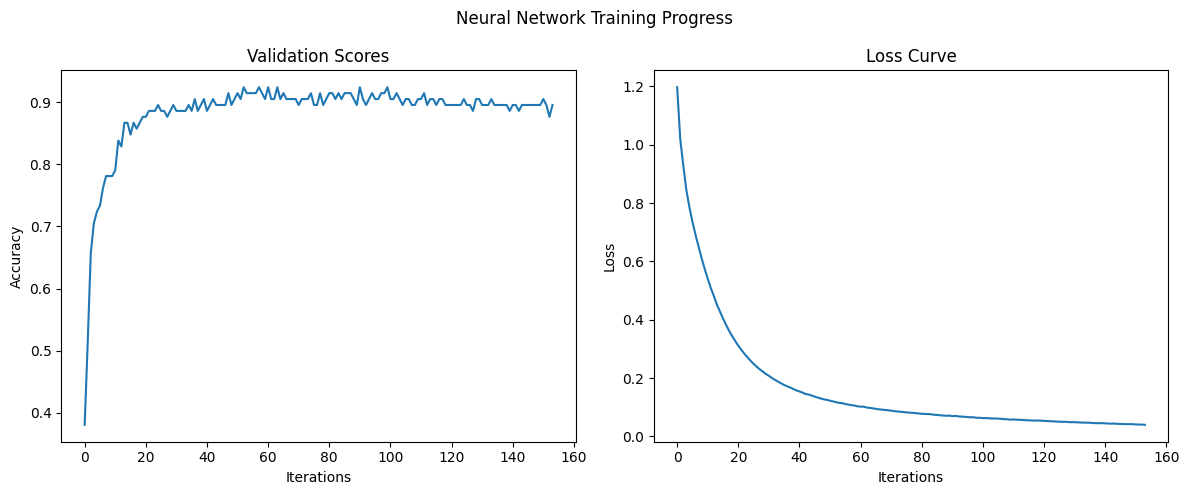

In [39]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot validation scores on the first subplot
if hasattr(mlp, 'validation_scores_'):
    ax[0].plot(mlp.validation_scores_)
    ax[0].set_title('Validation Scores')
    ax[0].set_xlabel('Iterations')
    ax[0].set_ylabel('Accuracy')

# Plot loss curve on the second subplot
ax[1].plot(mlp.loss_curve_)
ax[1].set_title('Loss Curve')
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('Loss')

# Add overall title and adjust layout
plt.suptitle('Neural Network Training Progress')
plt.tight_layout()

# Display the figure
plt.show()